#Análisis de Ventas - Challenge Data Science

### Importación de datos



In [61]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [62]:
print(df_total.columns)


Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda',
       'Facturación'],
      dtype='object')


In [63]:
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'


In [64]:
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

In [65]:
df_total['Facturación'] = df_total['Precio'] + df_total['Costo de envío']


In [66]:
facturacion_tienda = df_total.groupby('Tienda')['Facturación'].sum().sort_values(ascending=False)

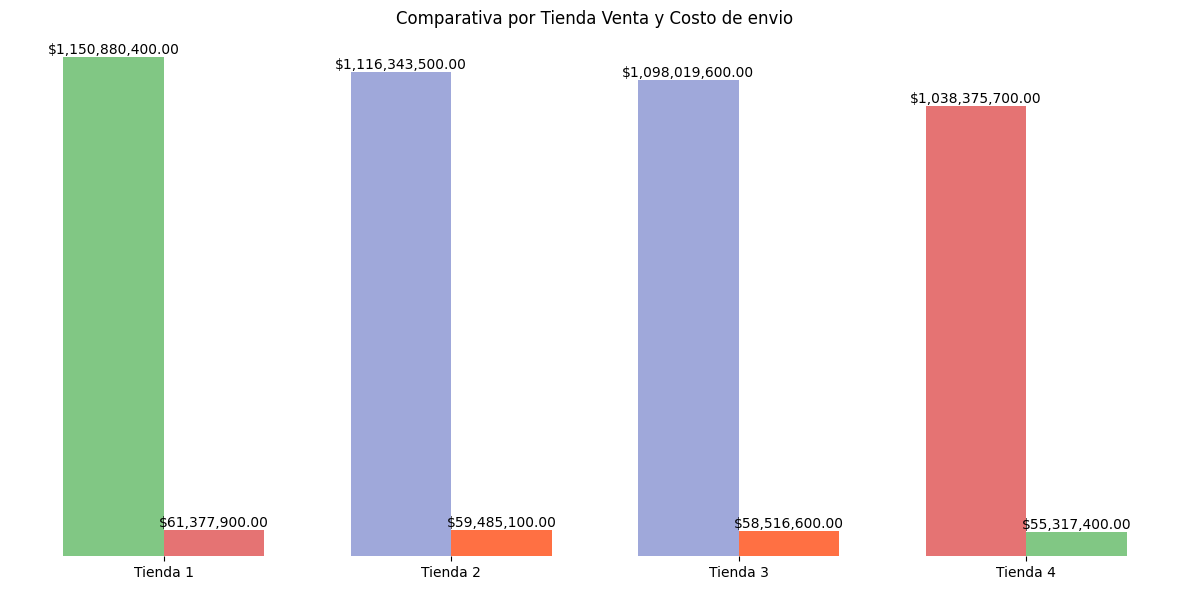

In [67]:

facturacion_tienda = df_total.groupby('Tienda')[['Precio', 'Costo de envío']].sum()
tiendas = list(facturacion_tienda.index)
x = range(len(tiendas))
ancho = 0.35


colores_precio = ['#9fa8da'] * len(tiendas)
colores_envio = ['#ff7043'] * len(tiendas)


colores_precio[tiendas.index(facturacion_tienda['Precio'].idxmax())] = '#81c784'
colores_precio[tiendas.index(facturacion_tienda['Precio'].idxmin())] = '#e57373'
colores_envio[tiendas.index(facturacion_tienda['Costo de envío'].idxmax())] = '#e57373'
colores_envio[tiendas.index(facturacion_tienda['Costo de envío'].idxmin())] = '#81c784'


fig, ax = plt.subplots(figsize=(12, 6))


ax.bar([i - ancho/2 for i in x], facturacion_tienda['Precio'],
       width=ancho, color=colores_precio)
ax.bar([i + ancho/2 for i in x], facturacion_tienda['Costo de envío'],
       width=ancho, color=colores_envio)


for i, (precio, envio) in enumerate(zip(facturacion_tienda['Precio'], facturacion_tienda['Costo de envío'])):
    ax.text(x[i] - ancho/2, precio, f"${precio:,.2f}", ha='center', va='bottom')
    ax.text(x[i] + ancho/2, envio, f"${envio:,.2f}", ha='center', va='bottom')


ax.set_title('Comparativa por Tienda Venta y Costo de envio')
ax.set_xticks(x)
ax.set_xticklabels(tiendas)


ax.yaxis.set_visible(False)
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

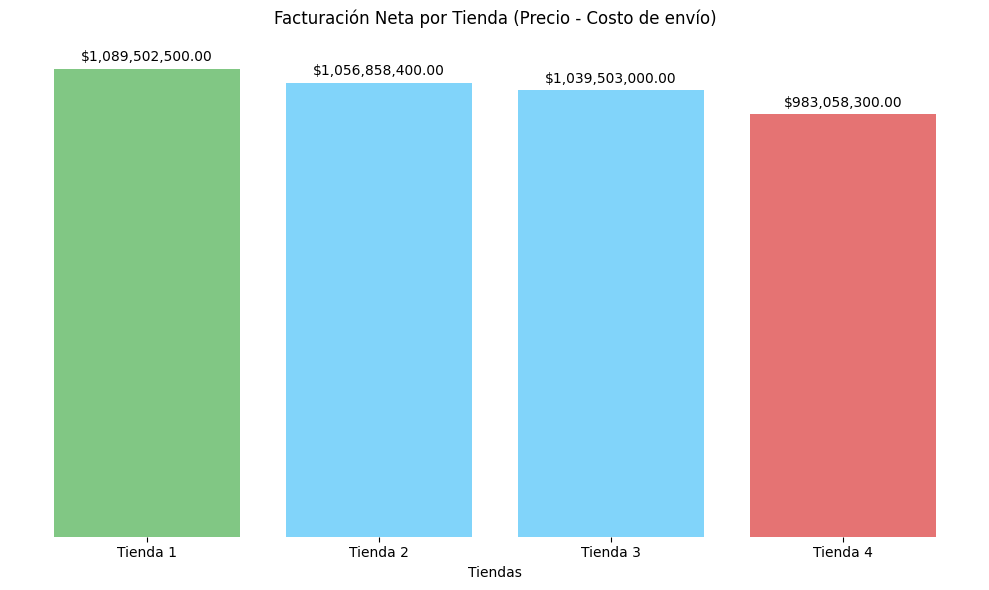

In [68]:

facturacion_neta_tienda = (
    df_total.groupby('Tienda')
    .agg(Facturación_Total=('Precio', 'sum'), Costo_Total=('Costo de envío', 'sum'))
    .eval('Facturacion_Neta = Facturación_Total - Costo_Total')
    ['Facturacion_Neta']
)


colores = ['#81d4fa'] * len(facturacion_neta_tienda)
colores[facturacion_neta_tienda.argmax()] = '#81c784'
colores[facturacion_neta_tienda.argmin()] = '#e57373'


plt.figure(figsize=(10, 6))
bars = plt.bar(facturacion_neta_tienda.index, facturacion_neta_tienda, color=colores)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + height*0.01,
             f"${height:,.2f}", ha='center', va='bottom', fontsize=10)


ax = plt.gca()
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

plt.title('Facturación Neta por Tienda (Precio - Costo de envío)', pad=15)
plt.xlabel('Tiendas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



In [70]:
from IPython.display import display

resumen = df_total.groupby('Tienda').agg(
    Ventas=('Precio', 'count'),
    Precio=('Precio', 'sum'),
    Costo_Envío=('Costo de envío', 'sum')
)

total_precio = resumen['Precio'].sum()
total_costo = resumen['Costo_Envío'].sum()
total_ventas = resumen['Ventas'].sum()

resumen = resumen.assign(
    Total_Neto = resumen['Precio'] - resumen['Costo_Envío'],
    Porc_Precio = round((resumen['Precio'] / total_precio) * 100, 1),
    Porc_Costo = round((resumen['Costo_Envío'] / total_costo) * 100, 1)
).sort_values('Total_Neto', ascending=False)

resumen.loc['TOTAL'] = {
    'Ventas': total_ventas,
    'Precio': total_precio,
    'Costo_Envío': total_costo,
    'Total_Neto': resumen['Total_Neto'].sum(),
    'Porc_Precio': 100,
    'Porc_Costo': 100
}

column_order = ['Ventas', 'Precio', 'Costo_Envío', 'Total_Neto', 'Porc_Precio', 'Porc_Costo']
resumen = resumen[column_order]

estilo = resumen.style.format({
    'Ventas': '{:,.0f}',
    'Precio': '${:,.2f}',
    'Costo_Envío': '${:,.2f}',
    'Total_Neto': '${:,.2f}',
    'Porc_Precio': '{:.1f}%',
    'Porc_Costo': '{:.1f}%'
}).set_table_styles([
    {'selector': 'tbody tr',
     'props': [
         ('background-color', '#4fc3f7'),
         ('border', '1px solid #263238')
     ]},
    {'selector': 'tbody tr:nth-child(even)',
     'props': [
         ('background-color', '#039be5')
     ]},
    {'selector': 'tr:last-child',
     'props': [
         ('background-color', '#1E3F66'),
         ('color', 'white'),
         ('font-weight', 'bold')
     ]}
]).set_caption(
    'ANÁLISIS POR TIENDAS (CON VENTAS)'
)

display(estilo)

,Ventas,Precio,Costo_Envío,Total_Neto,Porc_Precio,Porc_Costo
Tienda,,,,,,
Tienda 1,"2,359","$1,150,880,400.00","$61,377,900.00","$1,089,502,500.00",26.1%,26.2%
Tienda 2,"2,359","$1,116,343,500.00","$59,485,100.00","$1,056,858,400.00",25.4%,25.3%
Tienda 3,"2,359","$1,098,019,600.00","$58,516,600.00","$1,039,503,000.00",24.9%,24.9%
Tienda 4,"2,358","$1,038,375,700.00","$55,317,400.00","$983,058,300.00",23.6%,23.6%
TOTAL,"9,435","$4,403,619,200.00","$234,697,000.00","$4,168,922,200.00",100.0%,100.0%


# 2. Ventas por categoría

In [71]:
ventas_por_categoria = df_total.groupby('Categoría del Producto').agg(
    Ventas=('Producto', 'count'),
    Ingresos_Totales=('Precio', 'sum'),
    Costo_Envio_Total=('Costo de envío', 'sum'),
    Ingreso_Promedio=('Precio', 'mean'),
    Facturacion_Total=('Facturación', 'sum')
).reset_index()

ventas_por_categoria['Ganancia_Neta'] = ventas_por_categoria['Ingresos_Totales'] - ventas_por_categoria['Costo_Envio_Total']

ventas_por_categoria = ventas_por_categoria.sort_values('Ventas', ascending=False)

for col in ['Ingresos_Totales', 'Costo_Envio_Total', 'Ingreso_Promedio', 'Ganancia_Neta', 'Facturacion_Total']:
    ventas_por_categoria[col] = ventas_por_categoria[col].apply(lambda x: f"${x:,.2f}")

column_order = [
    'Categoría del Producto',
    'Ventas',
    'Ingresos_Totales',
    'Costo_Envio_Total',
    'Ingreso_Promedio',
    'Ganancia_Neta',
    'Facturacion_Total'
]

ventas_por_categoria = ventas_por_categoria[column_order]

display(ventas_por_categoria)

,Categoría del Producto,Ventas,Ingresos_Totales,Costo_Envio_Total,Ingreso_Promedio,Ganancia_Neta,Facturacion_Total
7,Muebles,1886,"$757,661,000.00","$40,450,400.00","$401,729.06","$717,210,600.00","$798,111,400.00"
3,Electrónicos,1772,"$1,660,576,500.00","$88,462,100.00","$937,119.92","$1,572,114,400.00","$1,749,038,600.00"
5,Juguetes,1290,"$73,604,400.00","$4,021,300.00","$57,057.67","$69,583,100.00","$77,625,700.00"
2,Electrodomésticos,1149,"$1,324,751,100.00","$70,396,300.00","$1,152,960.05","$1,254,354,800.00","$1,395,147,400.00"
1,Deportes y diversión,1113,"$142,977,700.00","$7,691,600.00","$128,461.55","$135,286,100.00","$150,669,300.00"
4,Instrumentos musicales,753,"$348,772,600.00","$18,504,300.00","$463,177.42","$330,268,300.00","$367,276,900.00"
6,Libros,742,"$37,696,100.00","$2,059,900.00","$50,803.37","$35,636,200.00","$39,756,000.00"
0,Artículos para el hogar,730,"$57,579,800.00","$3,111,100.00","$78,876.44","$54,468,700.00","$60,690,900.00"


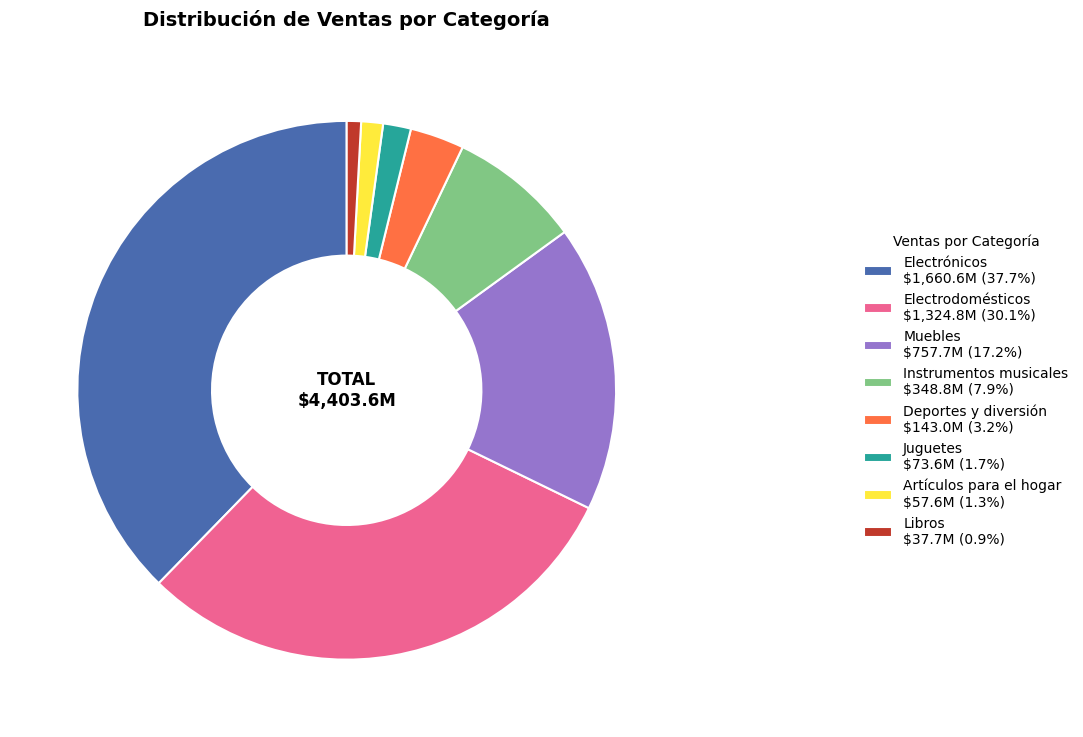

In [77]:
ventas_ordenadas = df_total.groupby('Categoría del Producto')['Precio'].sum().reset_index()
ventas_ordenadas.columns = ['Categoría del Producto', 'Ingresos_Totales_Num']
ventas_ordenadas = ventas_ordenadas.sort_values('Ingresos_Totales_Num', ascending=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

porcentajes = ventas_ordenadas['Ingresos_Totales_Num'] / ventas_ordenadas['Ingresos_Totales_Num'].sum() * 100

wedges = plt.pie(
    ventas_ordenadas['Ingresos_Totales_Num'],
    labels=None,
    startangle=90,
    colors=['#4a6baf','#f06292','#9575cd','#81c784','#ff7043', '#26a69a', '#ffeb3b', '#c0392b'],
    wedgeprops={'width':0.5, 'edgecolor':'white', 'linewidth':1.5},
    pctdistance=0.85
)[0]

centre_circle = plt.Circle((0,0), 0.2, color='white')
plt.gca().add_artist(centre_circle)

legend_labels = [
    f"{cat}\n${val/1000000:,.1f}M ({pct:.1f}%)"
    for cat, val, pct in zip(
        ventas_ordenadas['Categoría del Producto'],
        ventas_ordenadas['Ingresos_Totales_Num'],
        porcentajes
    )
]

plt.legend(
    wedges,
    legend_labels,
    title="Ventas por Categoría",
    loc="center left",
    bbox_to_anchor=(1.25, 0.5),
    fontsize=10,
    frameon=False
)

plt.text(0, 0, f"TOTAL\n${ventas_ordenadas['Ingresos_Totales_Num'].sum()/1000000:,.1f}M",
         ha='center', va='center', fontsize=12, fontweight='bold')

plt.title('Distribución de Ventas por Categoría', pad=20, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [78]:
calificacion_promedio = df_total.groupby('Tienda')['Calificación'].mean().reset_index()
calificacion_promedio.columns = ['Tienda', 'Calificación Promedio']
calificacion_promedio['Calificación Promedio'] = calificacion_promedio['Calificación Promedio'].round(3)

def clasificar_calificacion(promedio):
    if promedio >= 4.5:
        return 'Excelente ★★★★★'
    elif promedio >= 4.0:
        return 'Muy Bueno ★★★★'
    elif promedio >= 3.5:
        return 'Bueno ★★★'
    elif promedio >= 3.0:
        return 'Regular ★★'
    else:
        return 'Necesita Mejora ★'

calificacion_promedio['Categoría'] = calificacion_promedio['Calificación Promedio'].apply(clasificar_calificacion)

calificacion_promedio = calificacion_promedio.sort_values('Calificación Promedio', ascending=False)

print("\nClasificación de Tiendas por Satisfacción del Cliente:")
print(calificacion_promedio.to_string(index=False))

def clasificar_con_emojis(promedio):
    if promedio >= 4.5:
        return 'Excelente'
    elif promedio >= 4.0:
        return 'Muy Bueno'
    elif promedio >= 3.5:
        return 'Bueno'
    elif promedio >= 3.0:
        return 'Regular'
    else:
        return 'Necesita Mejora'

calificacion_promedio['Categoría (Emoji)'] = calificacion_promedio['Calificación Promedio'].apply(clasificar_con_emojis)


Clasificación de Tiendas por Satisfacción del Cliente:
  Tienda  Calificación Promedio      Categoría
Tienda 3                  4.048 Muy Bueno ★★★★
Tienda 2                  4.037 Muy Bueno ★★★★
Tienda 4                  3.996      Bueno ★★★
Tienda 1                  3.977      Bueno ★★★


# 4. Productos más y menos vendidos

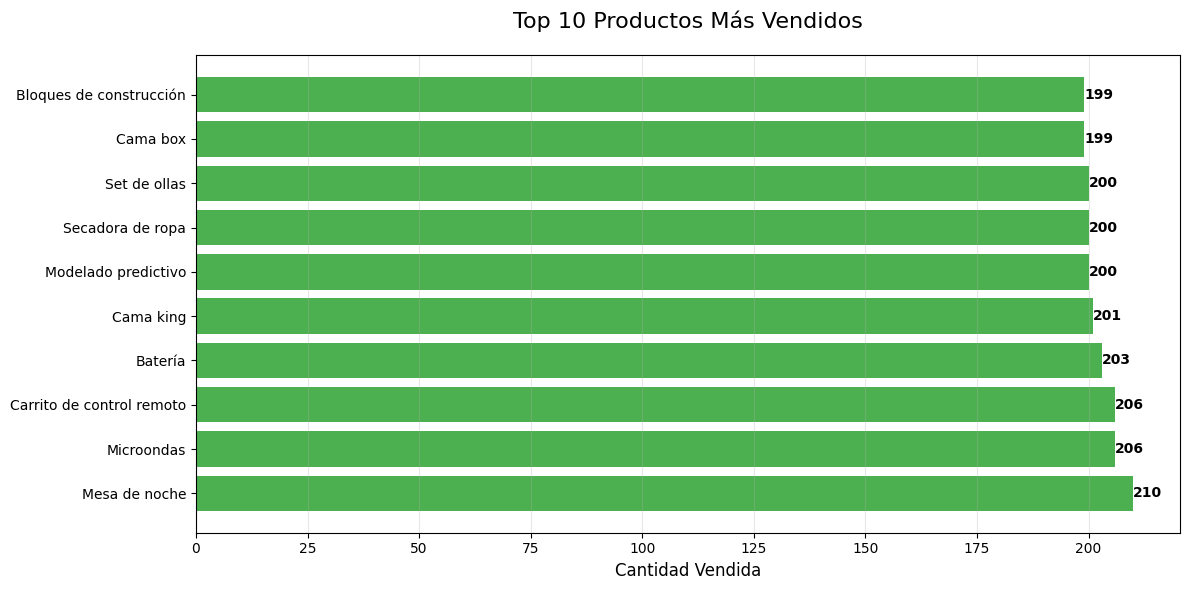

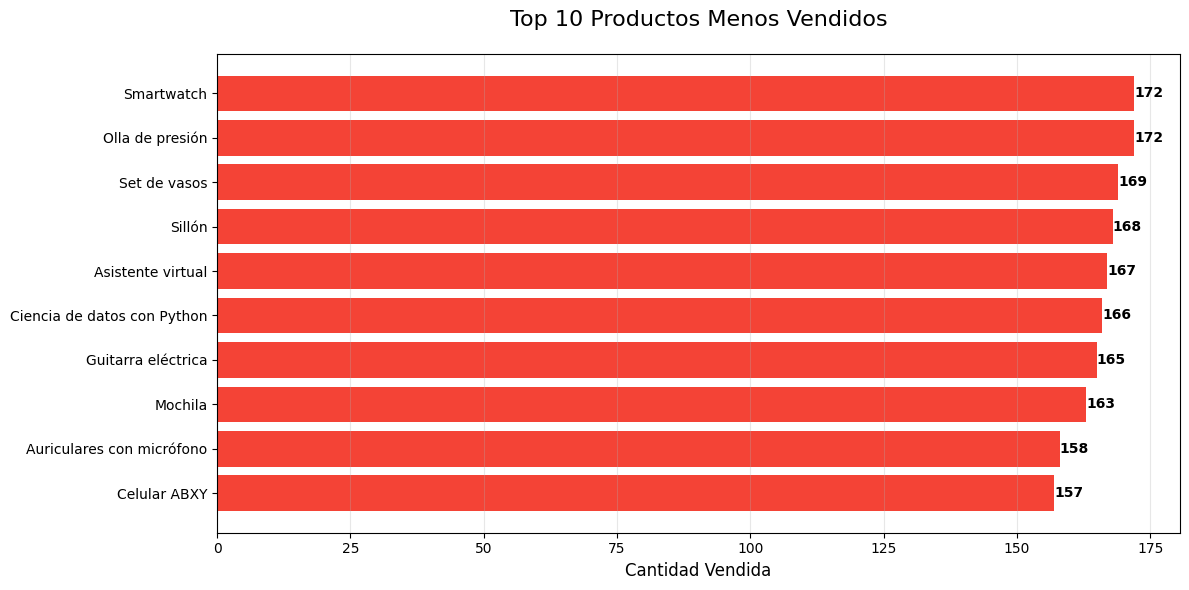


Comparativa de Productos Más y Menos Vendidos:
--------------------------------------------------
TOP 5 MÁS VENDIDOS:
                 Producto  Cantidad_Vendida  Ingresos_Totales
            Mesa de noche               210        58419500.0
               Microondas               206       115699500.0
Carrito de control remoto               206        14767700.0
                  Batería               203       147806300.0
                Cama king               201       135780400.0

TOP 5 MENOS VENDIDOS:
                   Producto  Cantidad_Vendida  Ingresos_Totales
               Celular ABXY               157       157911100.0
  Auriculares con micrófono               158        22748500.0
                    Mochila               163        16065700.0
         Guitarra eléctrica               165       129404800.0
Ciencia de datos con Python               166         9036100.0


In [80]:
productos_vendidos = df_total.groupby('Producto').agg(
    Cantidad_Vendida=('Producto', 'count'),
    Ingresos_Totales=('Precio', 'sum'),
    Calificacion_Promedio=('Calificación', 'mean')
).reset_index()

top_10_mas_vendidos = productos_vendidos.sort_values('Cantidad_Vendida', ascending=False).head(10)
bottom_10_menos_vendidos = productos_vendidos.sort_values('Cantidad_Vendida').head(10)

plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_mas_vendidos['Producto'],
               top_10_mas_vendidos['Cantidad_Vendida'],
               color='#4CAF50')

plt.title('Top 10 Productos Más Vendidos', fontsize=16, pad=20)
plt.xlabel('Cantidad Vendida', fontsize=12)
plt.grid(axis='x', alpha=0.3)

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}',
             va='center', ha='left',
             fontweight='bold')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
bars = plt.barh(bottom_10_menos_vendidos['Producto'],
               bottom_10_menos_vendidos['Cantidad_Vendida'],
               color='#F44336')

plt.title('Top 10 Productos Menos Vendidos', fontsize=16, pad=20)
plt.xlabel('Cantidad Vendida', fontsize=12)
plt.grid(axis='x', alpha=0.3)

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}',
             va='center', ha='left',
             fontweight='bold')

plt.tight_layout()
plt.show()

print("\nComparativa de Productos Más y Menos Vendidos:")
print("-"*50)
print("TOP 5 MÁS VENDIDOS:")
print(top_10_mas_vendidos[['Producto', 'Cantidad_Vendida', 'Ingresos_Totales']]
      .head(5).to_string(index=False))
print("\nTOP 5 MENOS VENDIDOS:")
print(bottom_10_menos_vendidos[['Producto', 'Cantidad_Vendida', 'Ingresos_Totales']]
      .head(5).to_string(index=False))


# 5. Envío promedio por tienda